<a href="https://colab.research.google.com/github/MMBAYAR/IPG23/blob/main/VEBET_Ders_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#    Graph formatting

plt.rcParams['font.size'] = 10

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [43]:
df = pd.read_csv( '/content/Auto(ogrenci).csv' ).iloc[:,1:]

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
0,18.0,NaN,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet
1,NaN,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick
2,18.0,8.0,318.0,150.0,NaN,11.0,70.0,NaN,plymouth
3,16.0,8.0,NaN,NaN,3433.0,NaN,70.0,1.0,amc
4,17.0,8.0,302.0,NaN,3449.0,10.5,70.0,NaN,ford
...,...,...,...,...,...,...,...,...,...
392,27.0,4.0,140.0,NaN,2790.0,15.6,82.0,1.0,ford
393,44.0,4.0,97.0,NaN,2130.0,NaN,82.0,2.0,volkswagen
394,32.0,4.0,NaN,84.0,2295.0,11.6,82.0,1.0,dodge
395,28.0,NaN,120.0,NaN,2625.0,18.6,82.0,NaN,ford


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,324.0,23.622222,7.762540,10.0,17.9,23.0,28.85,46.6
cylinders,313.0,5.456869,1.718739,3.0,4.0,4.0,8.00,8.0
displacement,308.0,189.910714,105.181630,68.0,98.0,140.0,258.00,455.0
horsepower,303.0,103.313531,39.530155,46.0,75.0,90.0,120.00,230.0
weight,327.0,2962.605505,857.953239,1613.0,2224.5,2745.0,3607.00,5140.0
acceleration,318.0,15.522013,2.750249,8.0,14.0,15.4,17.00,24.8
year,321.0,76.046729,3.688792,70.0,73.0,76.0,79.00,82.0
origin,327.0,1.577982,0.802147,1.0,1.0,1.0,2.00,3.0


In [8]:
#. df'nin içinde boş veri olmayan kısmı
dff = df.dropna( axis = 0, how = 'any' )
dff

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,make
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac
10,15.0,8.0,383.0,170.0,3563.0,10.0,70.0,1.0,dodge
21,24.0,4.0,107.0,90.0,2430.0,14.5,70.0,2.0,audi
23,26.0,4.0,121.0,113.0,2234.0,12.5,70.0,2.0,bmw
24,21.0,6.0,199.0,90.0,2648.0,15.0,70.0,1.0,amc
...,...,...,...,...,...,...,...,...,...
354,34.5,4.0,100.0,79.0,2320.0,15.8,81.0,2.0,renault
364,26.6,8.0,350.0,105.0,3725.0,19.0,81.0,1.0,oldsmobile
368,27.0,4.0,112.0,88.0,2640.0,18.6,82.0,1.0,chevrolet
370,31.0,4.0,112.0,85.0,2575.0,16.2,82.0,1.0,pontiac


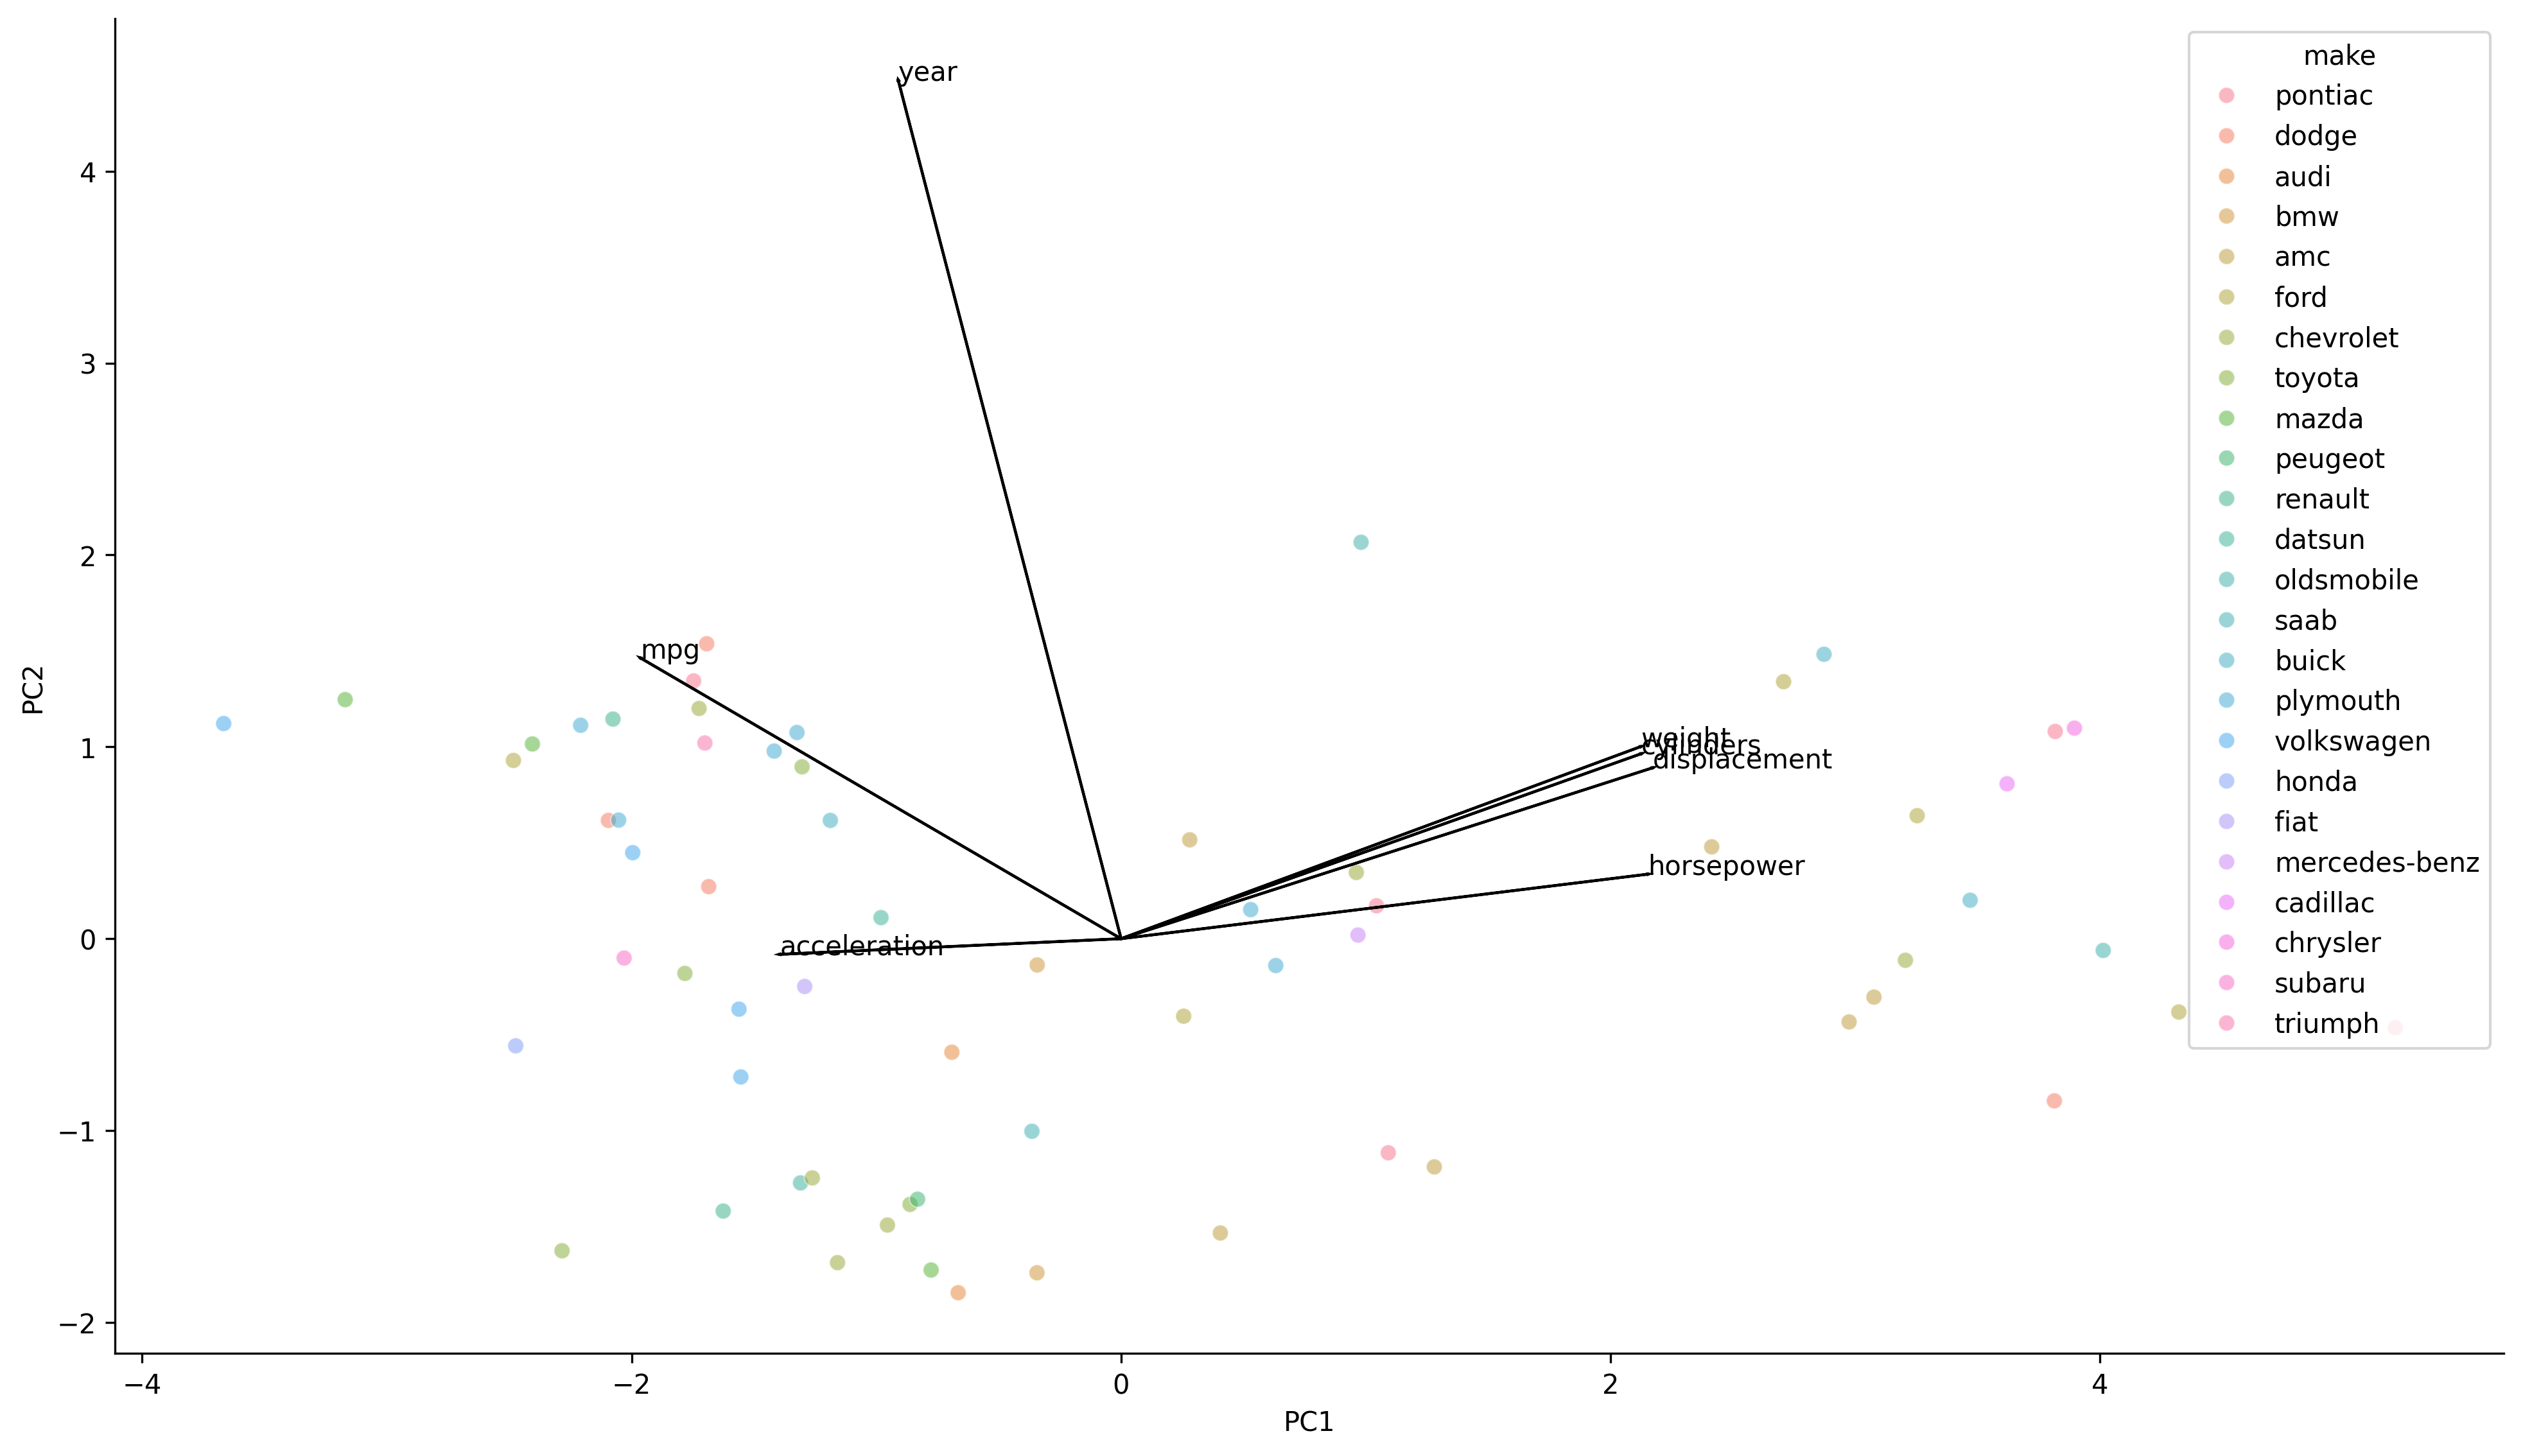

In [14]:
#. Data Visualization (PCA with feature vectors)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=True,
                        with_mean=True,)
df_scaled = scaler.fit_transform(dff.iloc[:,:-2])

pca = PCA()
pca.fit(df_scaled)

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax = sns.scatterplot(
                    x = pca.transform(df_scaled)[:,0],
                    y= pca.transform(df_scaled)[:,1],
                    alpha = .5,
                    # color = 'red',
                    # hue = dff.origin,
                    hue = dff.make,
                    )

ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for k in range(pca.components_.shape[1]):
  if k != 5:
    ax.arrow(0, 0, pca.components_[i,k]*5, pca.components_[j,k]*5)
    ax.text(pca.components_[i,k]*5,
            pca.components_[j,k]*5,

            df.columns[k])
  else:
    ax.arrow(0, 0, pca.components_[i,k]*5, pca.components_[j,k]*5)
    ax.text(pca.components_[i,k]*5,
            pca.components_[j,k]*5,

            df.columns[k])

plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['figure.dpi'] = 300

#. Eksik Veri Tamamlama Yaklaşımları:
##. Betimsel İstatistik Kullanma Yöntemi

İlk 7 sütunum sürekli değişkenlerden oluşuyor ve bu sütunlardaki eksik veriyi tamamlmak için ortalama kullanılabilir.

Son 2 sütunum kategorik değişkenlerden oluşuyor ve bu değer için sayısal etiketler tanımlanmış bile olsa bunların büyüklükleri (değerleri) hiçbir ek mesaj içermiyor.

Bu nedenle son iki sütundaki eksik veriyi tamamlamak adına ortalama kullanılamaz, mod kullanılabilir.

In [15]:
#. mpg verisindeki eksik değerleri ortalama ile tamamlamak

#.   mpg verisinin ortalama ve standart sapması
df.mpg.mean(), df.mpg.std()

(np.float64(23.622222222222224), 7.7625400394314985)

<Axes: xlabel='mpg', ylabel='Count'>

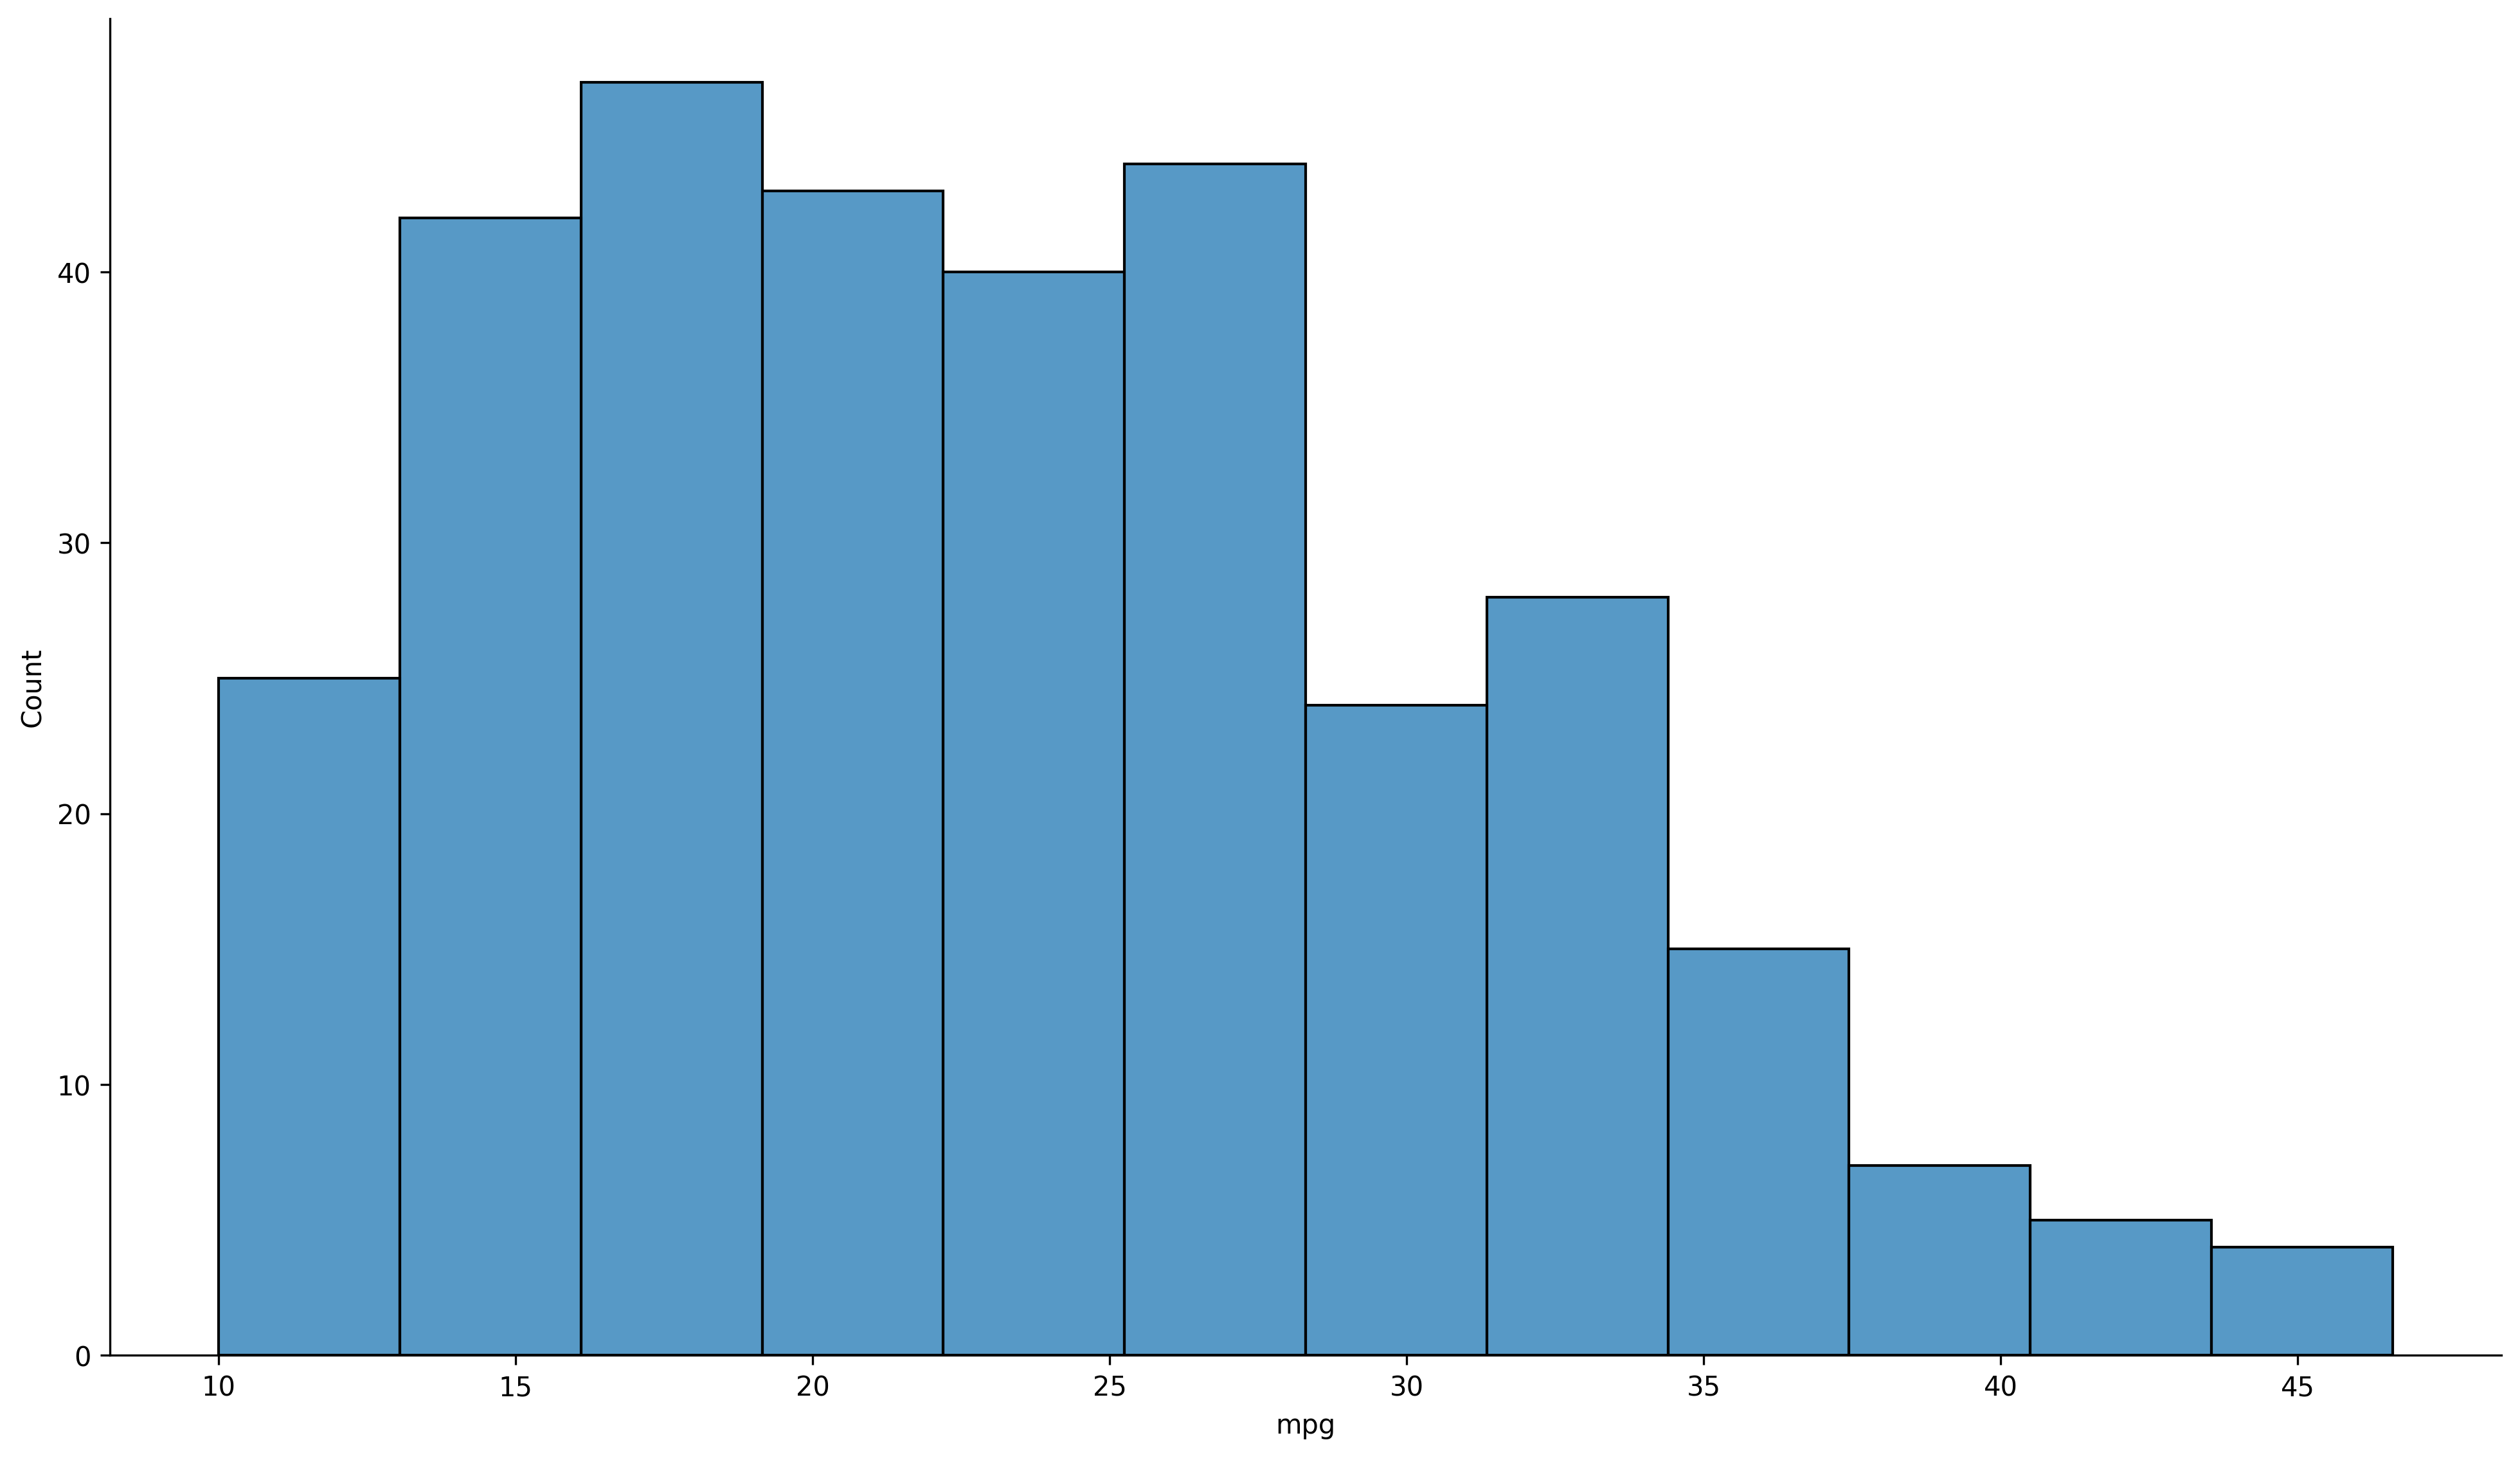

In [16]:
#. mpg verisinin histogramı
sns.histplot(df.mpg)

<Axes: xlabel='mpg', ylabel='Count'>

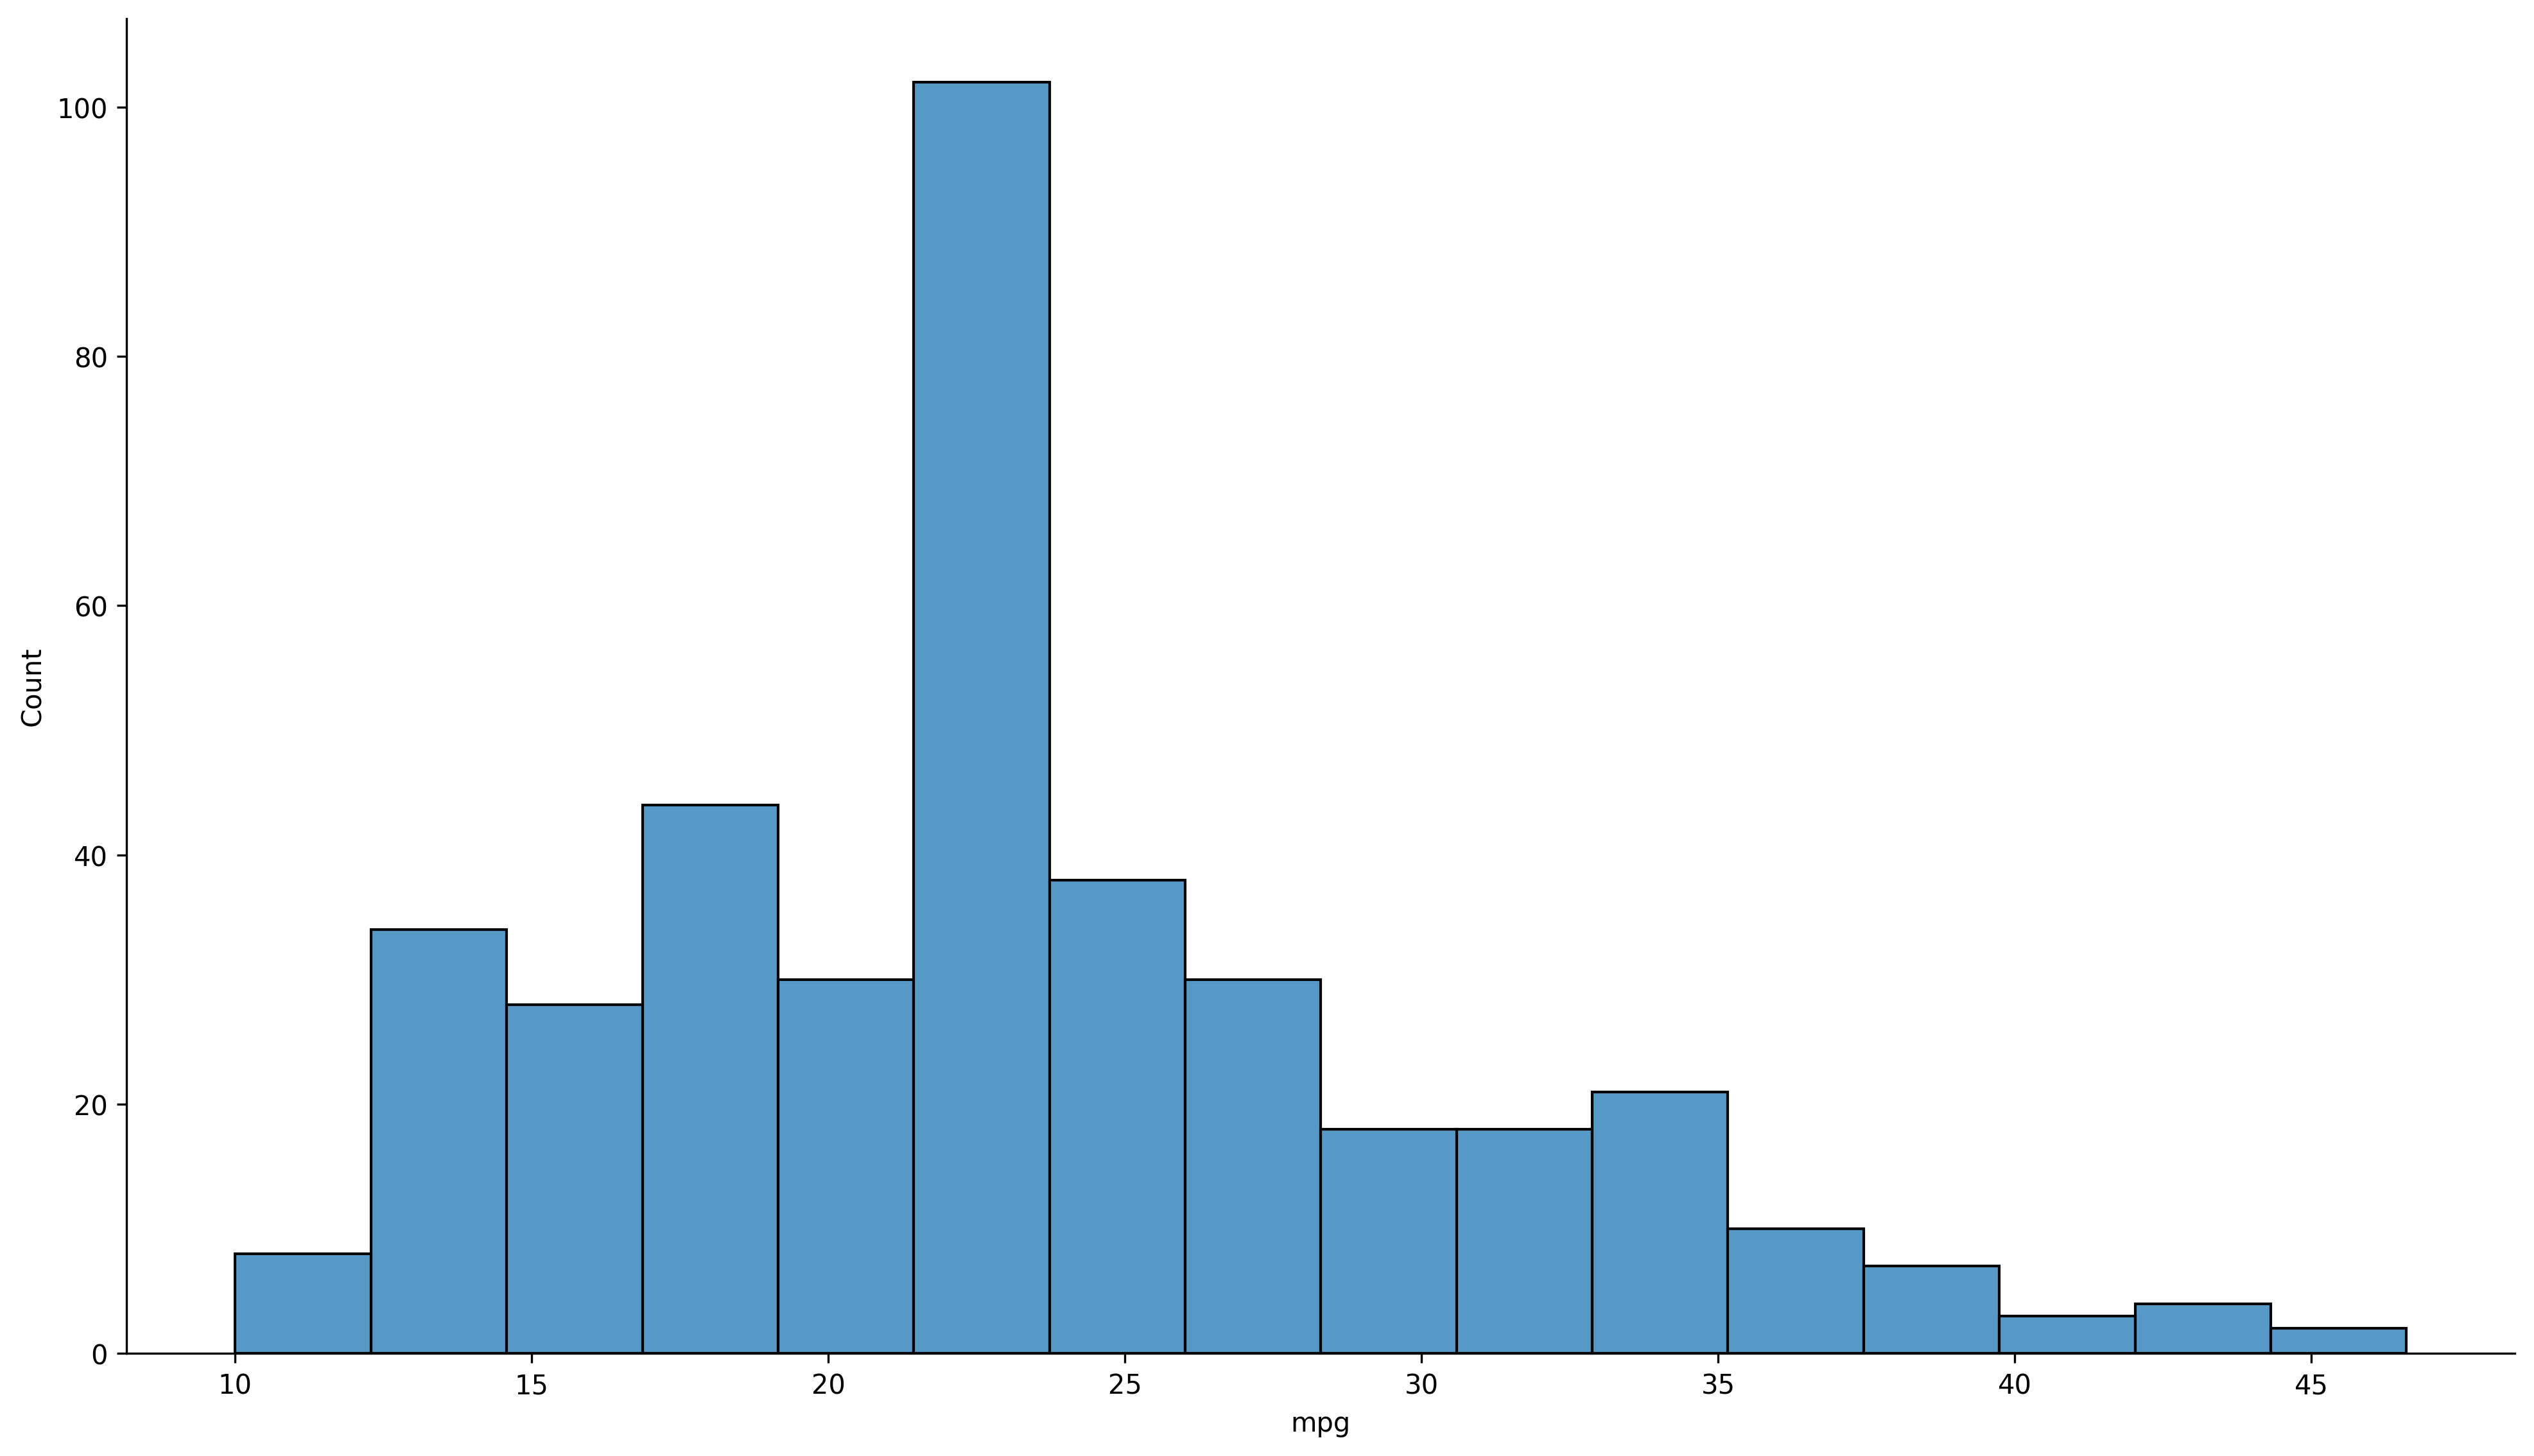

In [18]:
#.   ortalama ile tamamlama

sns.histplot(
            df.mpg.fillna(
                          value = df.mpg.mean(), # ortalama ile boş veri değerlerini doldur
                          )
            )

In [21]:
abs( df.iloc[:,:-2].corr() )

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,0.750685,0.768718,0.754497,0.820428,0.392811,0.552926
cylinders,0.750685,1.000000,0.947934,0.829989,0.898175,0.470505,0.350927
displacement,0.768718,0.947934,1.000000,0.893592,0.925932,0.548411,0.351260
horsepower,0.754497,0.829989,0.893592,1.000000,0.858240,0.671371,0.390421
weight,0.820428,0.898175,0.925932,0.858240,1.000000,0.446805,0.318563
acceleration,0.392811,0.470505,0.548411,0.671371,0.446805,1.000000,0.263210
year,0.552926,0.350927,0.351260,0.390421,0.318563,0.263210,1.000000


Türkiye'den rassal seçilen bir bireyin bana boyu soruldu. 168 cm olarak tahminledim. Bu bireyin erkek olduğu iletildi; tahminimi 174 cm olarak güncelledim. Bireyin doğum yerinin Mardin olduğu söylendi; tahminimi 182 cm olarak güncelldim.

Yukarıdaki örnek naif tahmin değerinden; ek bilgiden yararlanılarak gerçekleştirilen rafine etme sürecini gösteriyor. Bu rafine etme süreci; genel tahmin yerine sunulan alt kümeler içerisindeki tahminlere dayanılarak yapıldı.

Bu yaklaşımın benzeri bilmediğim veri başlığı ile en yüksek korelasyona sahip değerler cinsinden benzerlik ilişikileri ile de yapılabilir. Şimdi mpg'ye en yakın veri başlığı ile başlayark bir eksik veri tamamlama algoritması yazıyoruz.

In [25]:
#. mpg ile korele başlıklar listesi

abs( df.iloc[:,:-2].corr() ).sort_values( by = 'mpg', ascending = False ).index

Index(['mpg', 'weight', 'displacement', 'horsepower', 'cylinders', 'year',
       'acceleration'],
      dtype='object')

In [26]:
#. bu listede mpg de var onu çıkarıyorum

abs( df.iloc[:,:-2].corr() ).sort_values( by = 'mpg', ascending = False ).index[1:]

Index(['weight', 'displacement', 'horsepower', 'cylinders', 'year',
       'acceleration'],
      dtype='object')

In [44]:
for başlık in abs( df.iloc[:,:-2].corr() ).sort_values( by = 'mpg', ascending = False ).index[1:]:

  #. kaç standart sapma uzaklağındakiler benzerdir?
  #. bence 0.5 olsun...
  std = .25

  #. mpg verisi eksik satır başlık için başlıyorum:
  for satır in df[ df.mpg.isnull() ].index:
    if not df[başlık].iloc[ satır ].isnull:

      #. ilgili satırda weight değeri nedir?
      w = df[başlık].iloc[ satır ]
      #. weight için standart sapma nedir?
      s = df[başlık].std() * .5

      #. alt kümemi tanımlıyorum
      df.mpg.iloc[ satır ] = \
      df[ (df[başlık] <= df[başlık].iloc[ satır ] + df[başlık].std() * std) & \
          (df[başlık] >= df[başlık].iloc[ satır ] - df[başlık].std() * std) ].mpg.mean()

<ipython-input-44-a16e4d2a8c9b>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.mpg.iloc[ satır ] = \
<ipython-input-44-a16e4d2a8c9b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

<Axes: xlabel='mpg', ylabel='Count'>

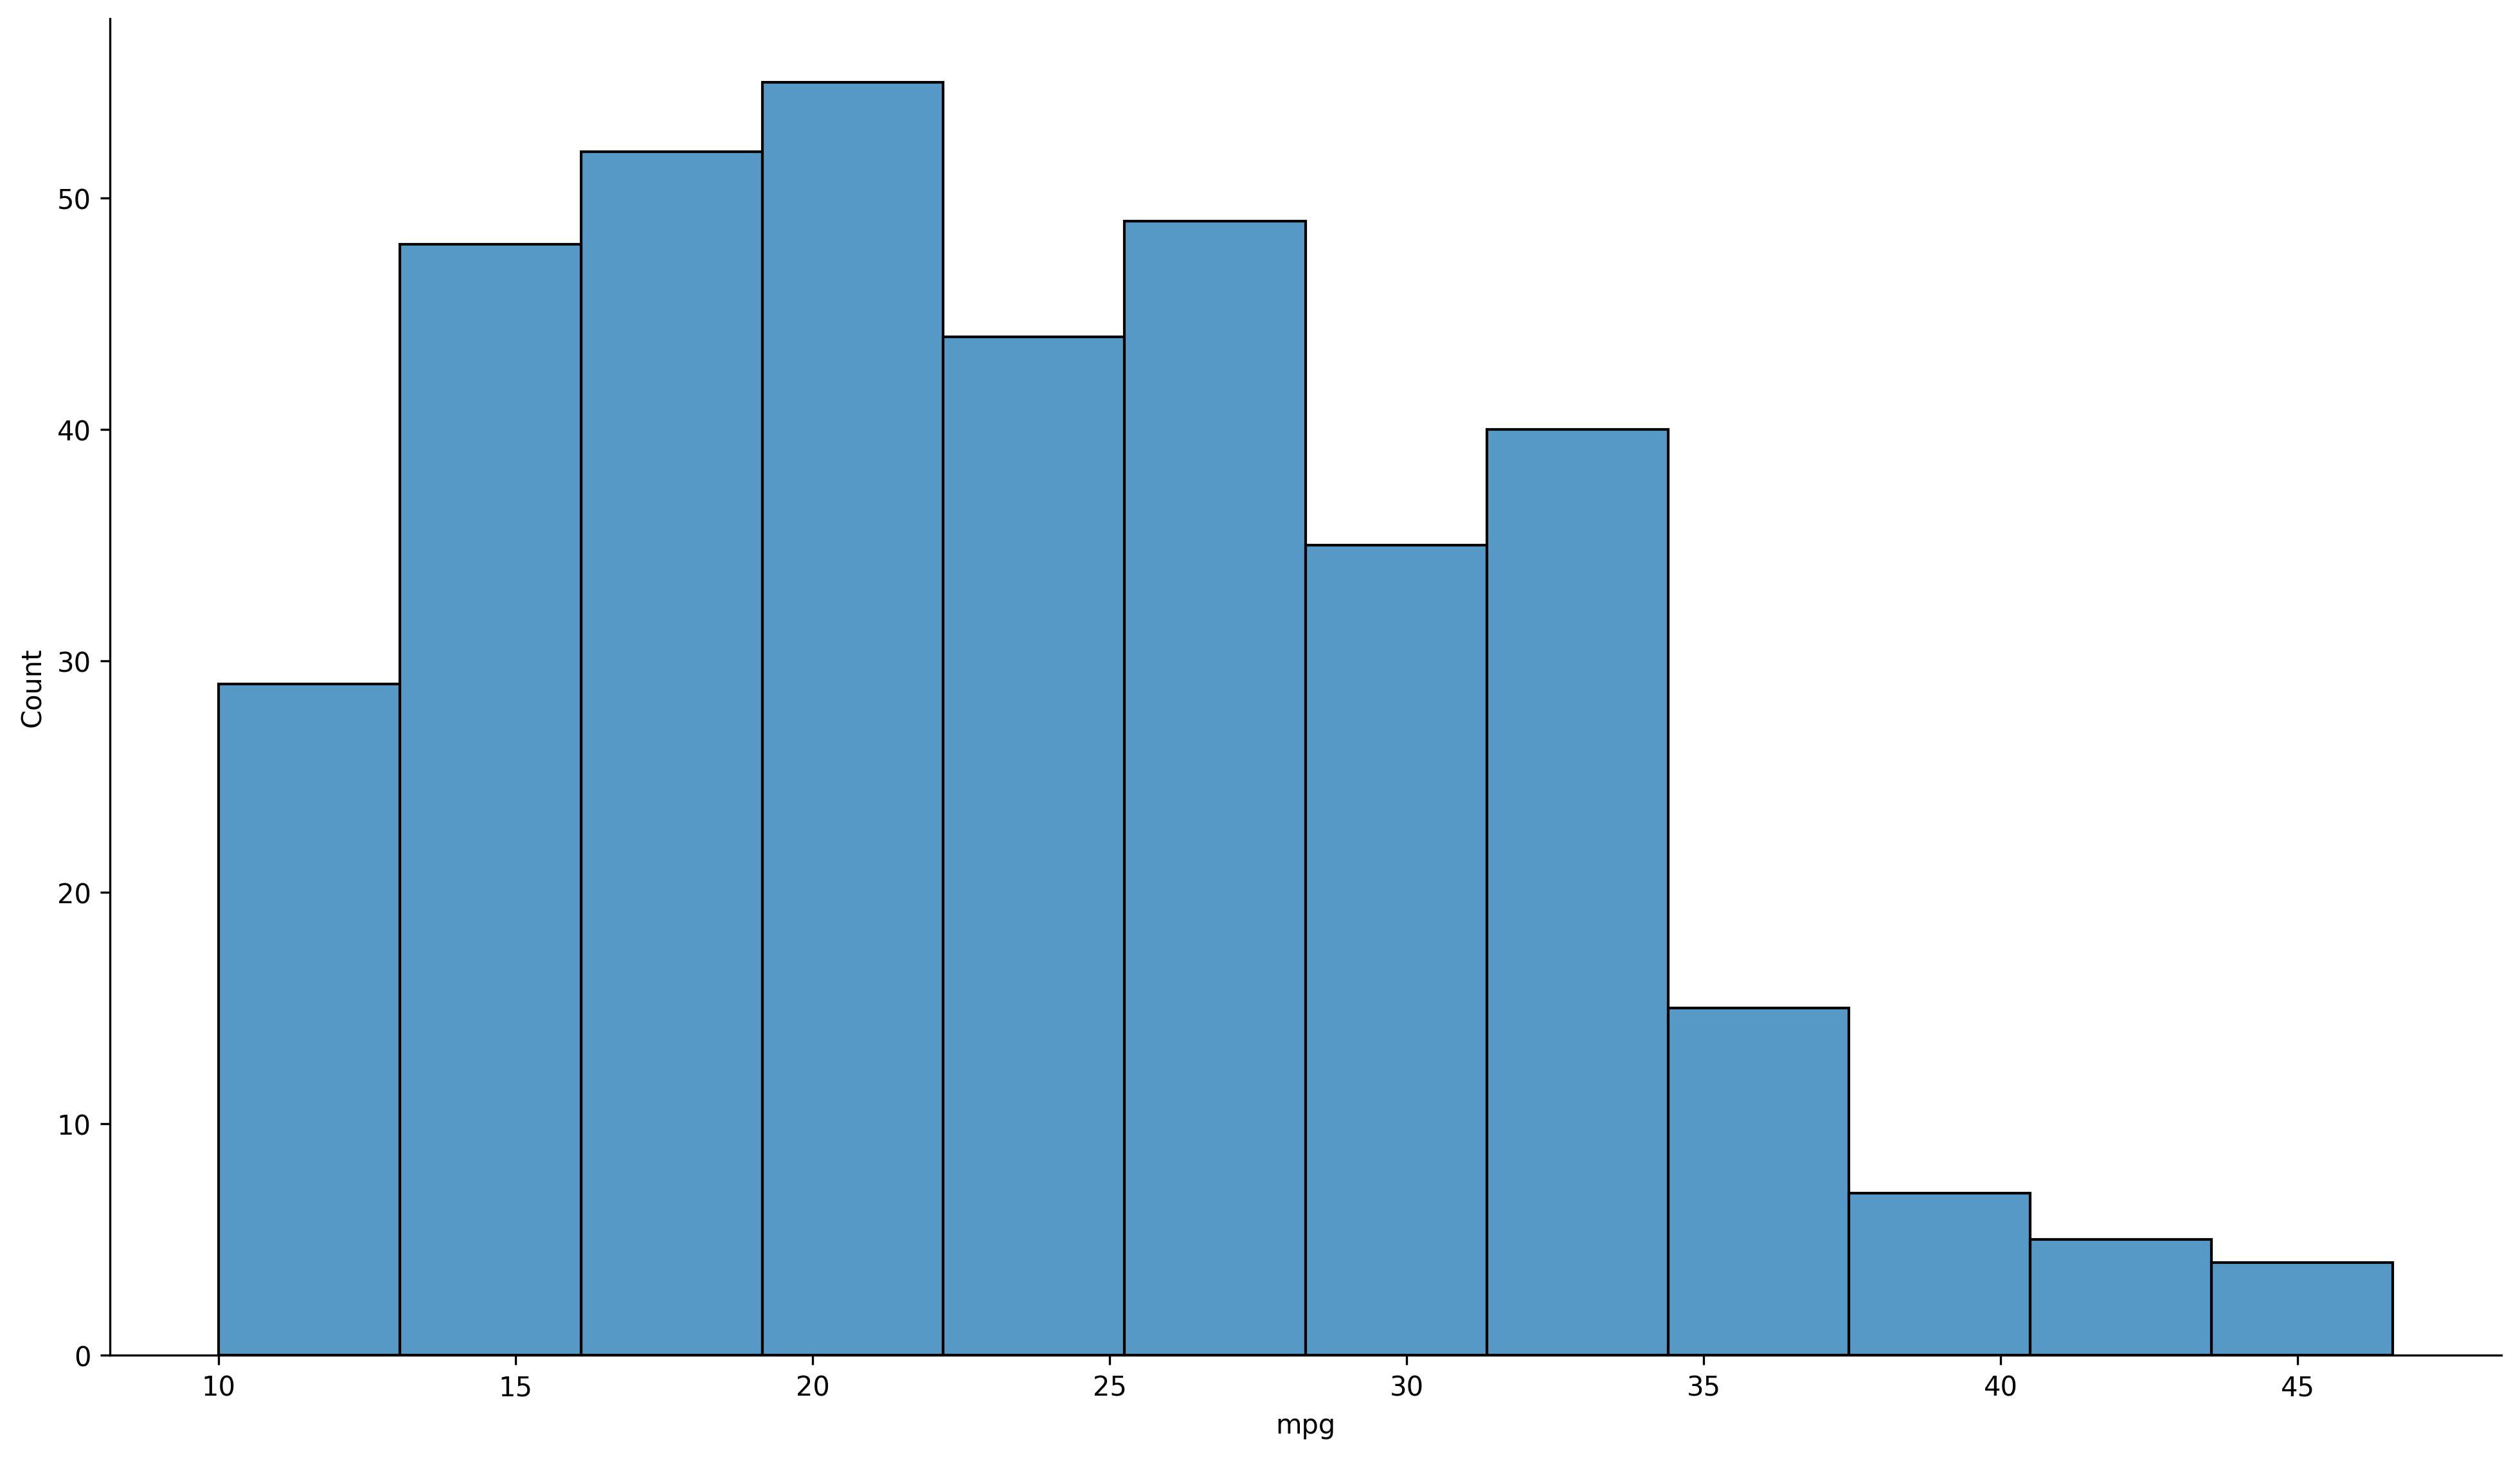

In [45]:
sns.histplot(df.mpg)

In [31]:
#. mpg değeri boş olanlar

df[ df.mpg.isnull() ].index

Index([  1,   7,   9,  11,  26,  28,  35,  44,  64,  69,  70,  94,  97, 104,
       108, 114, 123, 124, 131, 133, 139, 142, 144, 145, 148, 151, 154, 157,
       158, 161, 164, 165, 167, 173, 184, 192, 196, 202, 209, 218, 224, 233,
       237, 252, 254, 261, 263, 265, 272, 275, 279, 287, 288, 304, 310, 315,
       321, 327, 332, 344, 345, 346, 356, 360, 361, 371, 372, 374, 378, 385,
       387, 389, 396],
      dtype='int64')

In [33]:
df.weight.iloc[167]

np.float64(2171.0)

In [35]:
df.weight.std() * .5

428.9766197224217

In [37]:
df[ (df.weight <= df.weight.iloc[167] + df.weight.std() * .5) & (df.weight >= df.weight.iloc[167] - df.weight.std() * .5) ].mpg.mean()

np.float64(30.014414414414414)